# Persmaan Keadaan Gas Fermi Neutron
### mengacu pada jurnal "Neutron Stars for Undergraduates"

In [1]:
from sympy import *

u=Symbol('u')
a=integrate(sqrt(u**2+1.0)*u**2) #integrasi pers. (10)
b=integrate(u**4/sqrt(u**2+1.0)) #integrasi pers. (13)
y1=simplify(a)     #simplifikasi hasil integral
y2=simplify(b)/3.  #simplifikasi dengan menambah faktor 1/3 di depan persamaan (13)

print(y1)
print(y2)

(0.25*u**5 + 0.375*u**3 + 0.125*u - 0.125*sqrt(1.0*u**2 + 1)*asinh(1.0*u))/sqrt(1.0*u**2 + 1)
0.333333333333333*(0.25*u**5 - 0.125*u**3 - 0.375*u + 0.375*sqrt(1.0*u**2 + 1)*asinh(1.0*u))/sqrt(1.0*u**2 + 1)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import pi,c,hbar,m_n

x=np.linspace(0.0,2.,100) #range nilai x
eps0=m_n**4*c**5/(pi**2*hbar**3) #nilai konstanta di depan pers.(10) untuk m=massa neutron (tapi, karena pada pers.(44) menggunakan nilai yg tak berdimensi maka ini tidak dimasukkan dalam perhitungan)
epsee=(0.25*x**5 + 0.375*x**3 + 0.125*x - 0.125*np.sqrt(1.0*x**2 + 1)*np.arcsinh(1.0*x))/np.sqrt(1.0*x**2 + 1) #penulisan ulang hasil simplifikasi dengan mengganti symbol u
epse=3*epsee #total rapat energi pada pers.(11) dengan mengubah n (pers.(7)) menjadi x (x=kf/(m_n*c))
P=(0.25*x**5 - 0.125*x**3 - 0.375*x + 0.375*np.sqrt(1.0*x**2 + 1)*np.arcsinh(1.0*x))/np.sqrt(1.0*x**2 + 1) #penulisan ulang hasil simplifikasi dengan mengganti symbol u

plt.plot(x,epse) #plot antara x dengan epsee(rapat energi elektron saja, bukan rapat energi total)
plt.plot(x,P,color='red') #plot antara x dengan tekanan degenerasi elektron

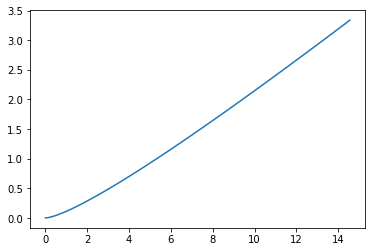

In [3]:
plt.plot(epse,P) #memastikan grafiknya berbentuk seperti pada gambar.2

In [4]:
np.savetxt("p vs e_N.txt",list(zip(epse,P)), fmt="%12.5e") #menyimpan data e dan P

In [5]:
e,p=np.loadtxt("p vs e_N.txt",unpack=True,skiprows=0)
print(p) #melihat range data P

[0.00000e+00 6.72885e-10 2.15229e-08 1.63321e-07 6.87533e-07 2.09545e-06
 5.20589e-06 1.12310e-05 2.18497e-05 3.92786e-05 6.63401e-05 1.06526e-04
 1.64061e-04 2.43955e-04 3.52064e-04 4.95131e-04 6.80841e-04 9.17853e-04
 1.21584e-03 1.58554e-03 2.03876e-03 2.58840e-03 3.24851e-03 4.03428e-03
 4.96207e-03 6.04942e-03 7.31506e-03 8.77891e-03 1.04621e-02 1.23870e-02
 1.45771e-02 1.70573e-02 1.98534e-02 2.29928e-02 2.65037e-02 3.04159e-02
 3.47601e-02 3.95683e-02 4.48738e-02 5.07109e-02 5.71152e-02 6.41235e-02
 7.17736e-02 8.01045e-02 8.91566e-02 9.89712e-02 1.09591e-01 1.21059e-01
 1.33420e-01 1.46721e-01 1.61008e-01 1.76329e-01 1.92734e-01 2.10273e-01
 2.28997e-01 2.48958e-01 2.70211e-01 2.92810e-01 3.16810e-01 3.42268e-01
 3.69243e-01 3.97793e-01 4.27977e-01 4.59858e-01 4.93496e-01 5.28956e-01
 5.66301e-01 6.05596e-01 6.46907e-01 6.90303e-01 7.35851e-01 7.83620e-01
 8.33680e-01 8.86104e-01 9.40963e-01 9.98331e-01 1.05828e+00 1.12089e+00
 1.18624e+00 1.25439e+00 1.32544e+00 1.39946e+00 1.

In [6]:
#cara lain untuk curve fitting tanpa nilai tebakan untuk memastikan hasilnya
from scipy.optimize import curve_fit

def eos_N(P,ANR,AR):
    return ANR*P**(3./5.)+AR*P

e,P=np.loadtxt("p vs e_N.txt",unpack=True)

popt,pcov=curve_fit(eos_N,P,e)

In [7]:
popt

array([2.53784142, 2.79036279])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


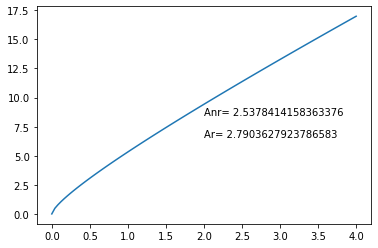

In [8]:
#curve fitting
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def eos_n(p,Anr,Ar): 
    return Anr*p**(3./5.)+Ar*p #pers.(44)

e,p=np.loadtxt("p vs e_N.txt",unpack=True) #menampilkan data e dan P
Anr0=2. #nilai tebakan/kira-kira
Ar0=2. #nilai tebakan/kira-kira

nlfit,nlpcov=curve_fit(eos_n,p,e,p0=[Anr0,Ar0]) #menggunakan curve_fit function

Anr,Ar=nlfit
dAnr,dAr=[np.sqrt(nlpcov[j,j])
     for j in range(nlfit.size)]

p_fit=np.linspace(0.,4.,100)  #range data P sebagai sumbu-x
e_fit=eos_n(p_fit,Anr,Ar) #memanggil fungsi eos_n sebagai pers.(44)

fig,ax=plt.subplots()
ax.plot(p_fit,e_fit,'-C0') #plot P sebagai data sumbu-x vs e sebagai sumbu-y
ax.text(0.5,0.5,"Anr= {}".format(Anr),transform=ax.transAxes)
ax.text(0.5,0.4,"Ar= {}".format(Ar),transform=ax.transAxes)
fig.show()